## CREDIT CARD FRAUD DETECTION - SHALU YADAV

## IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

## IMPORTING THE DATASET

In [2]:
df=pd.read_csv('C:\\Users\\HP\\Desktop\\Credit_Card_Fraud_Detection\\CreditDataset\\creditcard.csv')

## DATA VISUALIZATION

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('No of Non-Frauds cases:',round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the data')
print('No of Fraud cases:',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the data')

No of Non-Frauds cases: 99.83 % of the data
No of Fraud cases: 0.17 % of the data


## Data Preprocessing

In [5]:
standardScaler=StandardScaler();
robustScaler=RobustScaler();

df['scaledAmount']=robustScaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaledTime']=robustScaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)

In [6]:
scaledAmount=df['scaledAmount']
scaledTime=df['scaledTime']
df.drop(['scaledAmount','scaledTime'],axis=1,inplace=True)

df.insert(0,'scaledAmount',scaledAmount)
df.insert(1,'scaledTime',scaledTime)

In [7]:
df.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
X=df.drop('Class',axis=1)
Y=df['Class']

In [9]:
SKF=StratifiedKFold(n_splits=5,random_state=None ,shuffle=False)

In [10]:
for train_index , test_index in SKF.split(X,Y):
    print('Train:',train_index,'Test:',test_index)
    original_Xtrain,original_Xtest=X.iloc[train_index],X.iloc[test_index]
    original_Ytrain,original_Ytest=Y.iloc[train_index],Y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [11]:
original_Xtrain=original_Xtrain.values
original_Xtest=original_Xtest.values
original_Ytrain=original_Ytrain.values
original_Ytest=original_Ytest.values

In [12]:
train_uniques_labels,train_label_count=np.unique(original_Ytrain,return_counts=True)
test_uniques_labels,test_label_count=np.unique(original_Ytest,return_counts=True)

In [13]:
print(train_label_count/len(original_Ytrain))
print(test_label_count/len(original_Ytest))

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [14]:
df=df.sample(frac=1)
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]
distributed_df=pd.concat([fraud_df,non_fraud_df])
new_df=distributed_df.sample(frac=1,random_state=42)

In [15]:
new_df.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
194869,0.027807,0.541618,0.123498,0.202178,0.714970,-1.702724,-0.200512,-0.217324,0.150615,-0.022520,...,-0.077318,0.286988,0.993050,-0.101904,0.769039,-0.410366,0.678121,-0.115152,-0.001669,0
96789,1.110878,-0.220350,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,...,-0.478219,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,1
250481,-0.080207,0.825209,2.067431,-0.306578,-0.560247,0.595606,-0.537216,-0.737965,-0.264748,-0.269642,...,-0.571146,-0.764072,-1.646189,0.554162,-0.134991,-0.525994,-1.185031,0.064305,-0.020346,0
30384,-0.293440,-0.573233,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,...,0.981609,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,1
42473,-0.254454,-0.511942,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,...,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1


## DATA VISUALIZATION

Distribution of Data in the balanced dataset:
0    50.0
1    50.0
Name: Class, dtype: float64


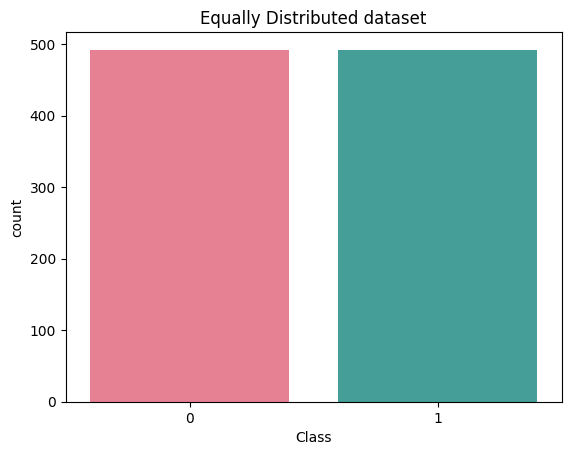

In [16]:
print('Distribution of Data in the balanced dataset:')
print(new_df['Class'].value_counts()/len(new_df)*100,)
sns.countplot(data=new_df,x='Class',palette='husl')
plt.title('Equally Distributed dataset')
plt.show()

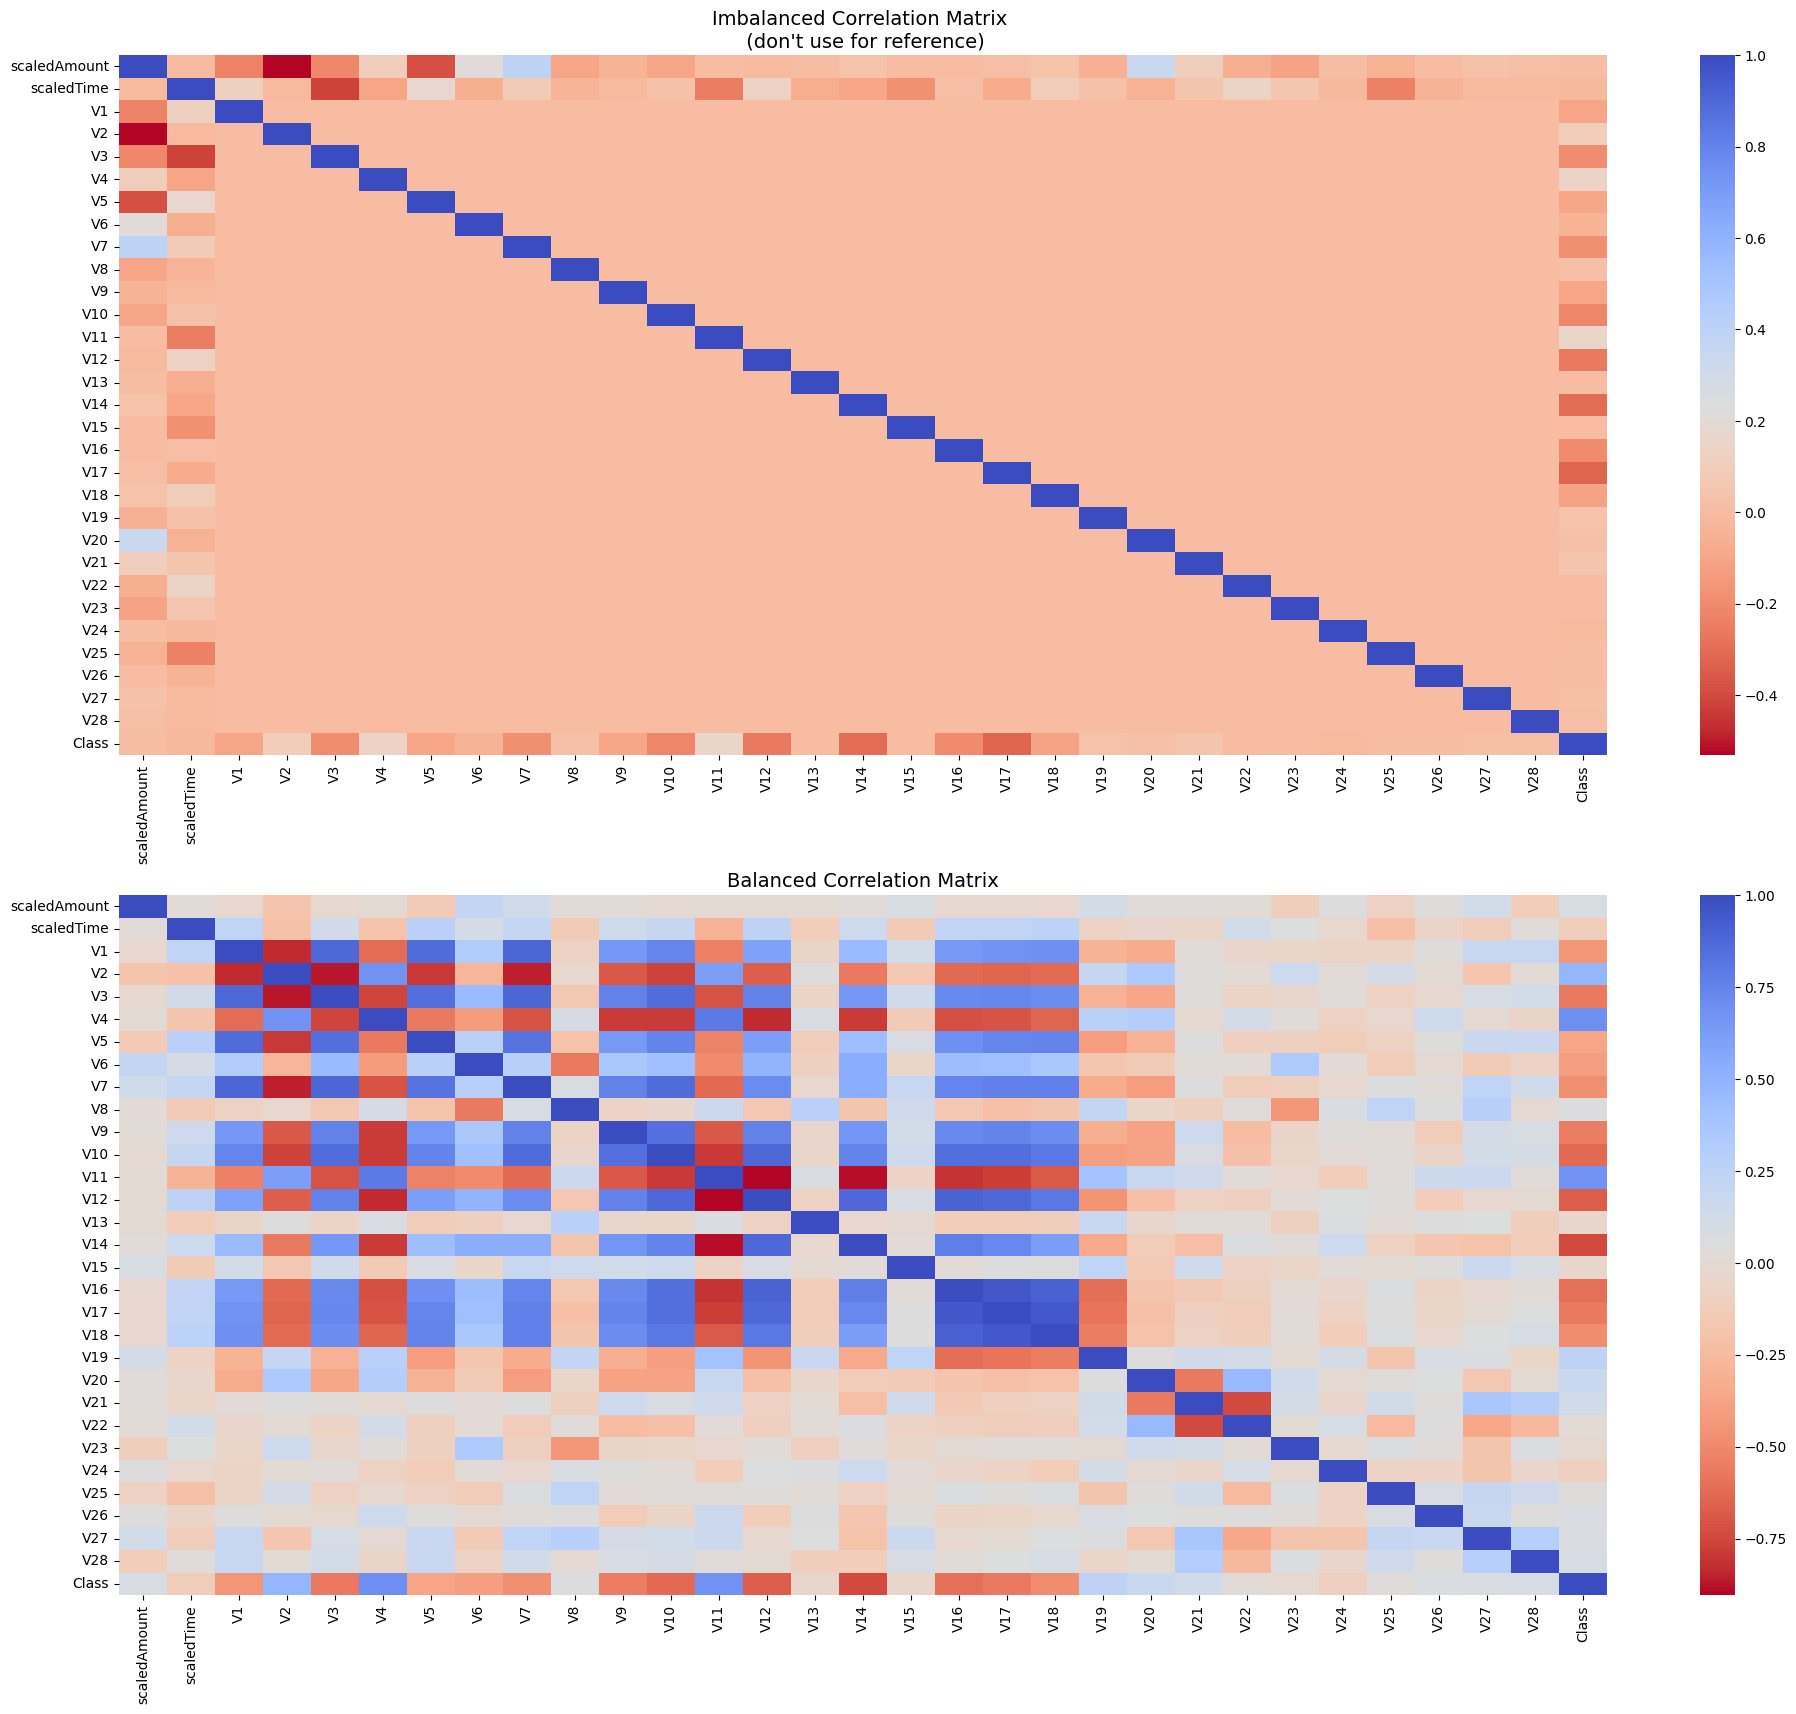

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)



new_corr=new_df.corr()
sns.heatmap(new_corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax2)
ax2.set_title("Balanced Correlation Matrix",fontsize=14)


plt.show()

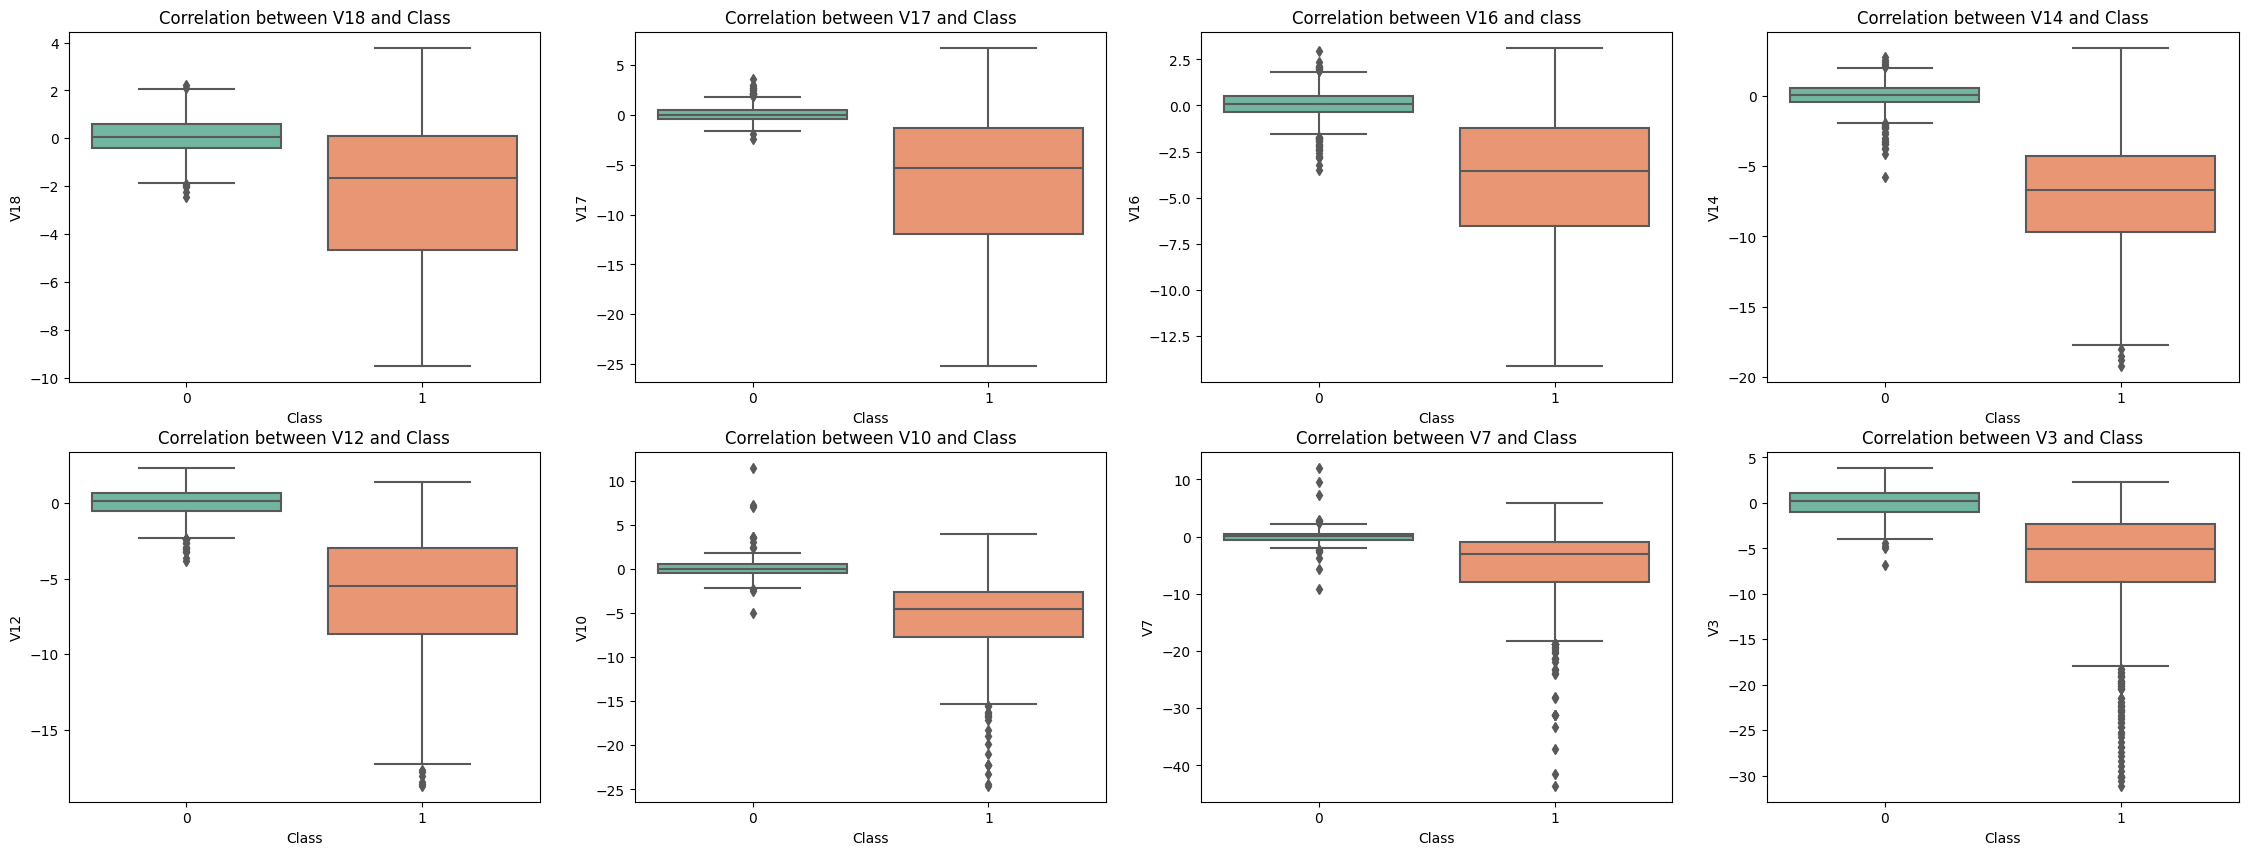

In [18]:
f, axes = plt.subplots(nrows=2,ncols=4, figsize=(28,10))
#Negative Correlation Between Class and '{V17,V16,V12,V10,V7,V3}
sns.boxplot(x="Class",y="V18",data=new_df ,palette="Set2", ax=axes[0][0])
axes[0][0].set_title("Correlation between V18 and Class")


sns.boxplot(x='Class',y="V17",data=new_df,palette="Set2",ax=axes[0][1])
axes[0][1].set_title("Correlation between V17 and Class")

sns.boxplot(x='Class',y="V16",data=new_df,palette="Set2",ax=axes[0][2])
axes[0][2].set_title("Correlation between V16 and class")

sns.boxplot(x='Class',y='V14',data=new_df,palette="Set2",ax=axes[0][3])
axes[0][3].set_title("Correlation between V14 and Class")

sns.boxplot(x='Class',y='V12',data=new_df,palette="Set2",ax=axes[1][0])
axes[1][0].set_title("Correlation between V12 and Class")

sns.boxplot(x='Class',y='V10',data=new_df,palette="Set2",ax=axes[1][1])
axes[1][1].set_title("Correlation between V10 and Class")

sns.boxplot(x='Class',y='V7',data=new_df,palette="Set2",ax=axes[1][2])
axes[1][2].set_title("Correlation between V7 and Class")

sns.boxplot(x='Class',y='V3',data=new_df,palette="Set2",ax=axes[1][3])
axes[1][3].set_title("Correlation between V3 and Class")

plt.show()

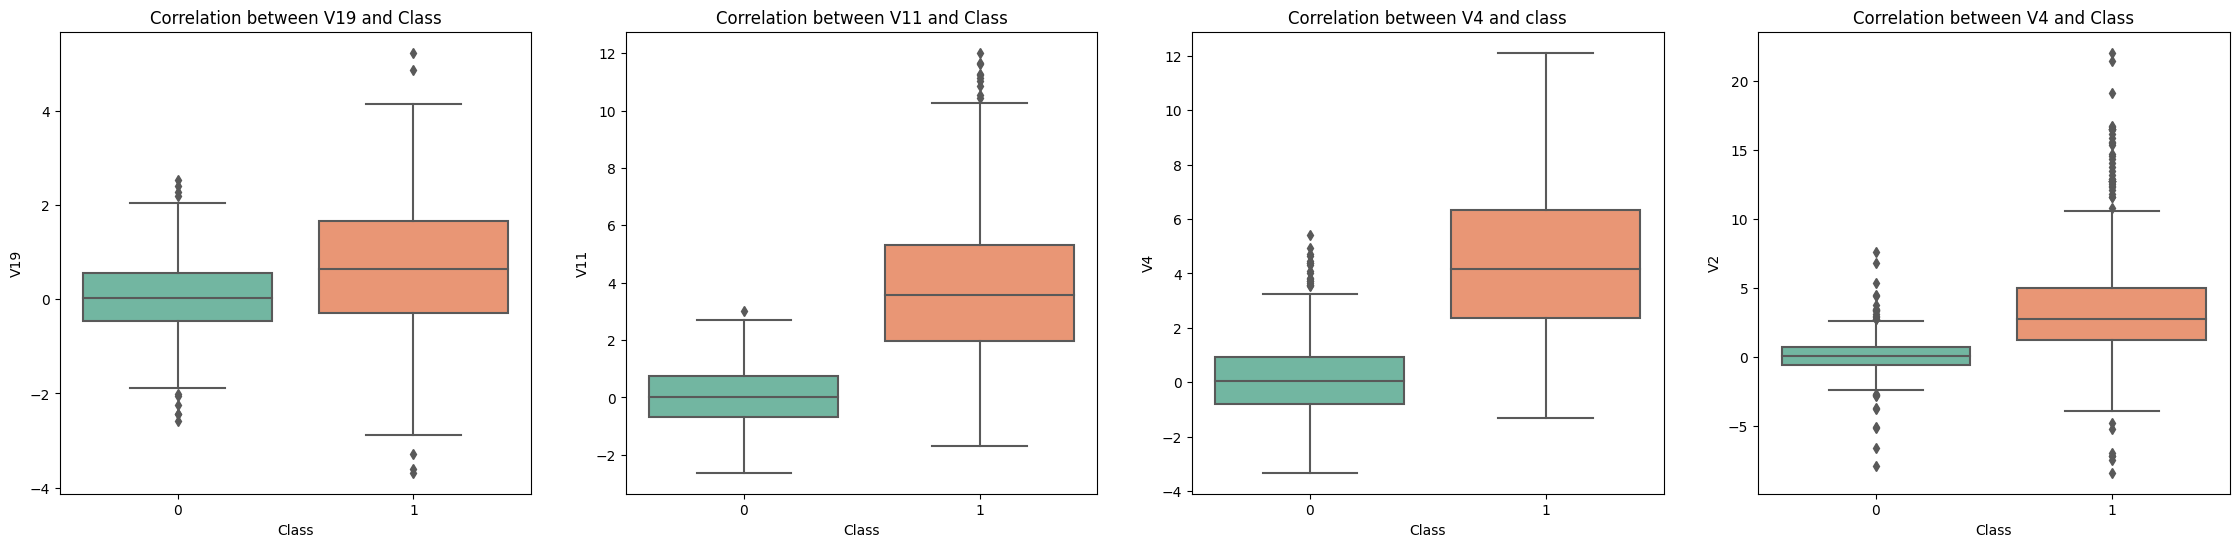

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(28,6))
#Positive Correlation Between Class and '{V19,V11,V4,V2}

sns.boxplot(x="Class",y="V19",data=new_df ,palette="Set2", ax=axes[0])
axes[0].set_title("Correlation between V19 and Class")


sns.boxplot(x='Class',y="V11",data=new_df,palette="Set2",ax=axes[1])
axes[1].set_title("Correlation between V11 and Class")

sns.boxplot(x='Class',y="V4",data=new_df,palette="Set2",ax=axes[2])
axes[2].set_title("Correlation between V4 and class")

sns.boxplot(x='Class',y='V2',data=new_df,palette="Set2",ax=axes[3])
axes[3].set_title("Correlation between V4 and Class")


plt.show()

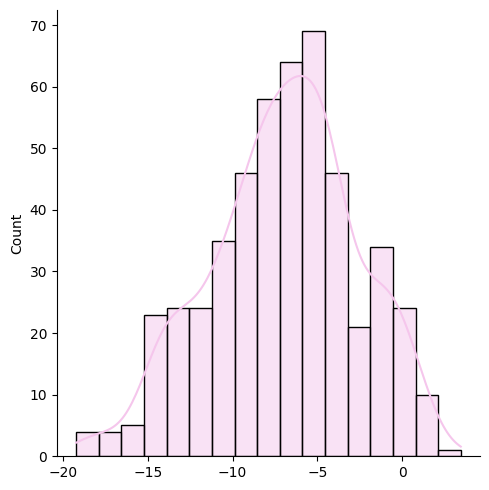

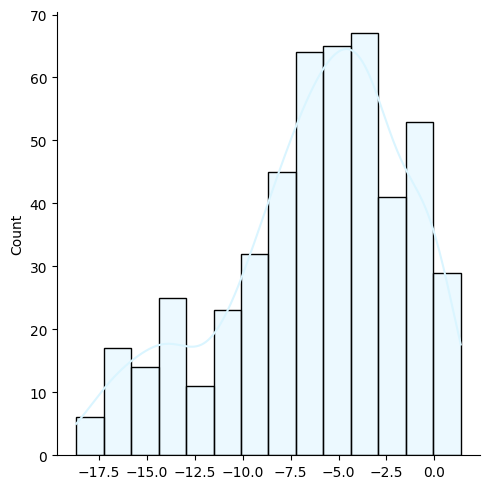

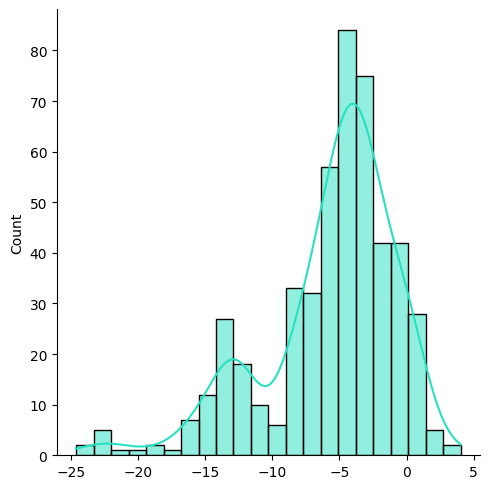

In [20]:
V14_fraud_dis=new_df['V14'].loc[new_df['Class']==1].values
sns.displot(data=V14_fraud_dis, kde=True,color="#F5C6EC")


V12_fraud_dis=new_df['V12'].loc[new_df['Class']==1].values
sns.displot(data=V12_fraud_dis,kde=True,color="#DAF5FF")

V10_fraud_dis=new_df['V10'].loc[new_df['Class']==1].values
sns.displot(data=V10_fraud_dis,kde=True,color='#27E1C1')

plt.show()


## REMOVING THE OUTLIER

In [21]:
#Outlier Removal 

##Removing Outliers in V14:

V14_fraud=new_df['V14'].loc[new_df['Class']==1].values
Q1_V14_fraud=np.percentile(V14_fraud,25)
Q3_V14_fraud=np.percentile(V14_fraud,75)
IQR_V14=Q3_V14_fraud-Q1_V14_fraud
lower_limit_V14=Q1_V14_fraud-1.5*IQR_V14
upper_limit_V14=Q3_V14_fraud+1.5*IQR_V14
outliers_V14 = [x for x in V14_fraud if x < lower_limit_V14 or x > upper_limit_V14]


print('Outlier Removal in V14')
print('Q1 quantile:{}',format(Q1_V14_fraud))
print('Q3 quantile:{}',format(Q3_V14_fraud))
print('Interquantile Range is:{}',format(IQR_V14))
print('V14 Upper Limit :{}'.format(upper_limit_V14))
print('V14 Lower Limit:{}',format(lower_limit_V14))
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers_V14)))

print('_____________'*44)


## Removing Outliers in V12:

V12_fraud=new_df['V12'].loc[new_df['Class']==1].values
Q1_V12_fraud=np.percentile(V12_fraud,25)
Q3_V12_fraud=np.percentile(V12_fraud,75)
IQR_V12=Q3_V12_fraud-Q1_V12_fraud
lower_limit_V12=Q1_V12_fraud-1.5*IQR_V12
upper_limit_V12=Q3_V12_fraud+1.5*IQR_V12
outliers_V12 = [x for x in V12_fraud if x < lower_limit_V12 or x > upper_limit_V12]


print('Outlier Removal in V12')
print('Q1 quantile:{}',format(Q1_V12_fraud))
print('Q3 quantile:{}',format(Q3_V12_fraud))
print('Interquantile Range is:{}',format(IQR_V12))
print('V12 Upper Limit :{}'.format(upper_limit_V12))
print('V12 Lower Limit:{}',format(lower_limit_V12))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers_V12)))

print('_____________'*44)


## Removing Outliers in V10

V10_fraud=new_df['V10'].loc[new_df['Class']==1].values
Q1_V10_fraud=np.percentile(V10_fraud,25)
Q3_V10_fraud=np.percentile(V10_fraud,75)
IQR_V10=Q3_V10_fraud-Q1_V10_fraud
lower_limit_V10=Q1_V10_fraud-1.5*IQR_V10
upper_limit_V10=Q3_V10_fraud+1.5*IQR_V10
outliers_V10 = [x for x in V10_fraud if x < lower_limit_V10 or x > upper_limit_V10]


print('Outlier Removal in V10')
print('Q1 quantile:{}',format(Q1_V10_fraud))
print('Q3 quantile:{}',format(Q3_V10_fraud))
print('Interquantile Range is:{}',format(IQR_V10))
print('V10 Upper Limit :{}'.format(upper_limit_V10))
print('V10 Lower Limit:{}',format(lower_limit_V10))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers_V10)))




Outlier Removal in V14
Q1 quantile:{} -9.692722964972386
Q3 quantile:{} -4.282820849486865
Interquantile Range is:{} 5.409902115485521
V14 Upper Limit :3.8320323237414167
V14 Lower Limit:{} -17.807576138200666
Feature V14 Outliers for Fraud Cases: 4
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Outlier Removal in V12
Q1 quantile:{} -8.688176521812306
Q3 quantile:{} -2.97408802538493
Interquantile Range is:{} 5.714088496427376
V12 Upper Limit :5.597044719256134
V12 Lowe

In [22]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)


In [23]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

## SPLITTING THE DATASET

In [24]:
# splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

## LOGISTIC REGRESSION MODEL

In [64]:
#Logistic Regression

clf_LR=LogisticRegression().fit(X_train,y_train)
training_score=cross_val_score(clf_LR,X_train,y_train,cv=5)
testing_score_LR=clf_LR.score(X_test,y_test)
y_predict_LR=clf_LR.predict(X_test)
print('The training score for Logistic Regression is :',round(training_score.mean()*100,2))
print('The testing score for Logistic Regression is:',round(testing_score_LR.mean()*100,2))

The training score for Logistic Regression is : 93.9
The testing score for Logistic Regression is: 90.86


## LOGISTIC REGRESSION METRICS

           predicted fraud  predicted normal
is Fraud                96                14
is Normal                4                83


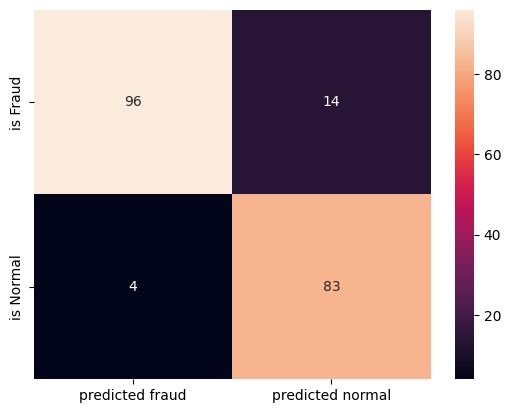

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        87
           1       0.96      0.87      0.91       110

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [74]:
cm_LR=np.array(confusion_matrix(y_test,y_predict_LR,labels=[1,0]))
confusion_LR=pd.DataFrame(cm_LR,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_LR)
import seaborn as sns
sns_LR=sns.heatmap(confusion_LR,annot=True)
plt.show(sns_LR)
print(classification_report(y_test,y_predict_LR))

## K-NEIGHBOUR MODEL

In [80]:
## K-Neighbour 
clf_KN=KNeighborsClassifier().fit(X_train,y_train)
training_score_kn=cross_val_score(clf_KN,X_train,y_train)
testing_score_kn=clf_KN.score(X_test,y_test)
y_predict_kn=clf_KN.predict(X_test)
print('The training score for k-Nearest Neighbour is :',round(training_score_kn.mean()*100,2))
print('The testing score for k-Nearest Neighbour is :',round(testing_score_kn.mean()*100,2))

The training score for k-Nearest Neighbour is : 93.77
The testing score for k-Nearest Neighbour is : 89.85


## K-NEIGHBOUR METRICS

           predicted fraud  predicted normal
is Fraud                93                17
is Normal                3                84


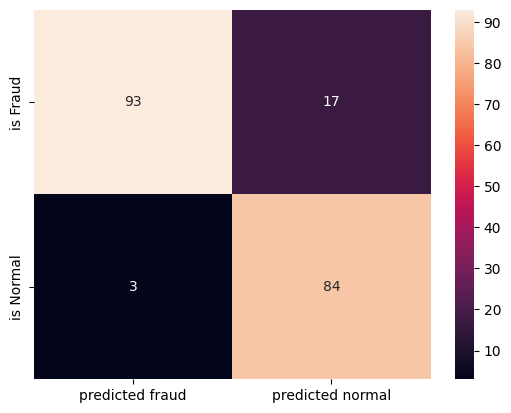

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        87
           1       0.97      0.85      0.90       110

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197



In [81]:
cm_kn=np.array(confusion_matrix(y_test,y_predict_kn,labels=[1,0]))
confusion_kn=pd.DataFrame(cm_kn,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_kn)
import seaborn as sns
sns_kn=sns.heatmap(confusion_kn,annot=True)
plt.show(sns_kn)
print(classification_report(y_test,y_predict_kn))

## SUPPORT VECTOR MODEL

In [82]:
##Support vector classifier

clf_SVC=SVC().fit(X_train,y_train)
training_score_SVC=cross_val_score(clf_SVC,X_train,y_train)
testing_score_SVC=clf_SVC.score(X_test,y_test)
y_predict_SVC=clf_SVC.predict(X_test)
print('The training score for SVC is',round(training_score_SVC.mean()*100,2))
print('The testing score for SVC is',round(testing_score_SVC.mean()*100,2))

The training score for SVC is 92.63
The testing score for SVC is 89.85


## SUPPORT VECTOR MODEL METRICS

           predicted fraud  predicted normal
is Fraud                92                18
is Normal                2                85


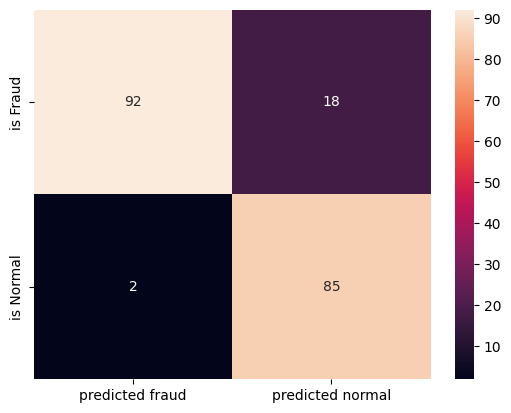

              precision    recall  f1-score   support

           0       0.83      0.98      0.89        87
           1       0.98      0.84      0.90       110

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197



In [83]:
cm_SVC=np.array(confusion_matrix(y_test,y_predict_SVC,labels=[1,0]))
confusion_SVC=pd.DataFrame(cm_SVC,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_SVC)
import seaborn as sns
sns_SVC=sns.heatmap(confusion_SVC,annot=True)
plt.show(sns_SVC)
print(classification_report(y_test,y_predict_SVC))

## DECISION TREE MODEL

In [84]:
## Decision tree classifier

clf_tree=DecisionTreeClassifier().fit(X_train,y_train)
training_score_tree=cross_val_score(clf_tree,X_train,y_train)
testing_score_tree=clf_tree.score(X_test,y_test)
y_predict_tree=clf_tree.predict(X_test)
print('Training score for Decision Tree Classifier:',round(training_score_tree.mean()*100,2))
print('Testing score for Decision Tree Classifier:',round(testing_score_tree.mean()*100,2))

Training score for Decision Tree Classifier: 90.73
Testing score for Decision Tree Classifier: 88.83


## DECISION TREE METRICS

           predicted fraud  predicted normal
is Fraud                98                12
is Normal               10                77


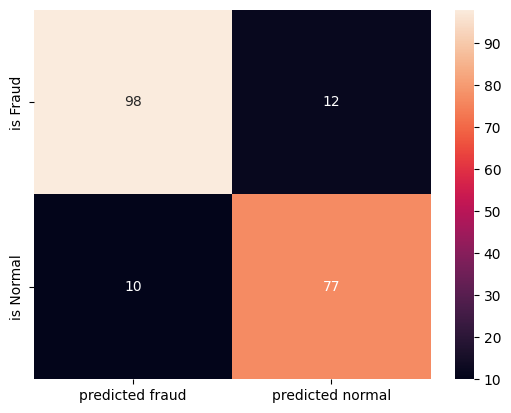

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        87
           1       0.91      0.89      0.90       110

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [85]:
cm_tree=np.array(confusion_matrix(y_test,y_predict_tree,labels=[1,0]))
confusion_tree=pd.DataFrame(cm_tree,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_tree)
import seaborn as sns
sns_tree=sns.heatmap(confusion_tree,annot=True)
plt.show(sns_tree)
print(classification_report(y_test,y_predict_tree))

## LOGISTIC REGRESSION USING GRID SEARCH

In [30]:
#Linear Regression using Grid Search 
from sklearn.model_selection import GridSearchCV

clf_LR_CV=GridSearchCV(LogisticRegression(max_iter=10000,solver='saga'),{
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,1,10,100,1000],
    })

clf_LR_CV.fit(X_train,y_train)
log_reg_best=clf_LR_CV.best_estimator_

In [87]:
log_reg_best_score=cross_val_score(log_reg_best,X_train,y_train,cv=5)
training_LR_CV_score=clf_LR_CV.score(X_train,y_train)
testing_LR_CV_score=clf_LR_CV.score(X_test,y_test)
y_predict_LR_CV=clf_LR_CV.predict(X_test)
print('Logistic Regression with GridSearchCV training score',round(training_LR_CV_score.mean()*100,2))
print('Logistic Regression with GridSearchCV testing score',round(testing_LR_CV_score.mean()*100,2))
print('Logistic Regression cross validation score:',round(log_reg_best_score.mean()*100,2),'%')

Logistic Regression with GridSearchCV training score 94.79
Logistic Regression with GridSearchCV testing score 89.34
Logistic Regression cross validation score: 94.16 %


## LOGISTIC REGRESSION USING GRID SEARCH METRICS

           predicted fraud  predicted normal
is Fraud                95                15
is Normal                6                81


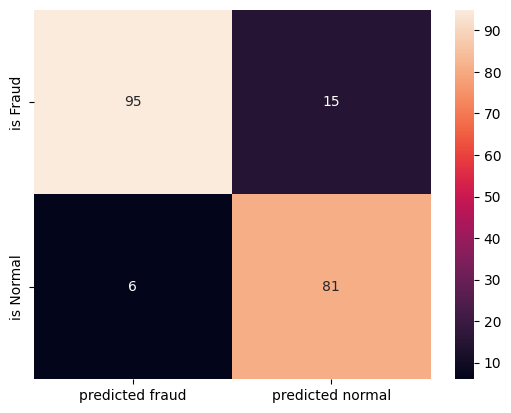

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        87
           1       0.94      0.86      0.90       110

    accuracy                           0.89       197
   macro avg       0.89      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197



In [88]:
cm_LR_CV=np.array(confusion_matrix(y_test,y_predict_LR_CV,labels=[1,0]))
confusion_LR_CV=pd.DataFrame(cm_LR_CV,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_LR_CV)
import seaborn as sns
sns_LR_CV=sns.heatmap(confusion_LR_CV,annot=True)
plt.show(sns_LR_CV)
print(classification_report(y_test,y_predict_LR_CV))

## SUPPORT VECTOR MACHINE USING GRID SEARCH

In [96]:
clf_svc_cv=GridSearchCV(SVC(),{
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'kernel':['linear','poly','rbf','sigmoid']
})
clf_svc_cv.fit(X_train,y_train)
SVC_best=clf_svc_cv.best_estimator_
SVC_best_score=cross_val_score(SVC_best,X_train,y_train,cv=5)
training_SVC_CV_score=clf_svc_cv.score(X_train,y_train)
testing_SVC_CV_score=clf_svc_cv.score(X_test,y_test)
y_predict_SVC_CV=clf_svc_cv.predict(X_test)
print('Support Vector Classifier with GridSearchCV training score',round(training_SVC_CV_score.mean()*100,2))
print('Support Vector Classifier with GridSearchCV testing score',round(testing_SVC_CV_score.mean()*100,2))
print("Support Vector Classifier cross validation score is:",round(SVC_best_score.mean()*100,2),'%')

Support Vector Classifier with GridSearchCV training score 95.04
Support Vector Classifier with GridSearchCV testing score 90.86
Support Vector Classifier cross validation score is: 94.54 %


##  SUPPORT VECTOR MACHINE USING GRID SEARCH METRICS

           predicted fraud  predicted normal
is Fraud                96                14
is Normal                4                83


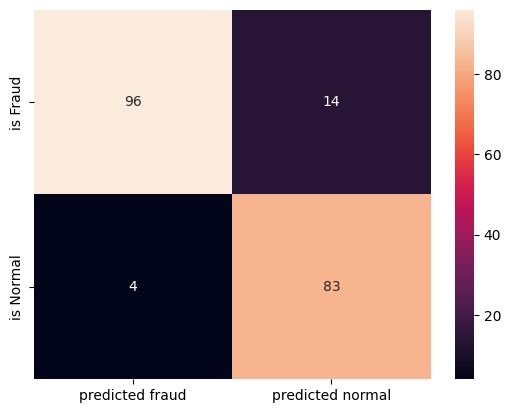

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        87
           1       0.96      0.87      0.91       110

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [98]:
cm_SVC_CV=np.array(confusion_matrix(y_test,y_predict_SVC_CV,labels=[1,0]))
confusion_SVC_CV=pd.DataFrame(cm_SVC_CV,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_SVC_CV)
import seaborn as sns
sns_SVC_CV=sns.heatmap(confusion_SVC_CV,annot=True)
plt.show(sns_SVC_CV)
print(classification_report(y_test,y_predict_SVC_CV))

## DECISION TREE USING GRID SEARCH

In [104]:
clf_tree_cv=GridSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy','log_loss'],
    'max_depth':list(range(2,4,1))
})
clf_tree_cv.fit(X_train,y_train)
tree_best_score=cross_val_score(tree_best,X_train,y_train,cv=5)
training_tree_CV_score=clf_tree_cv.score(X_train,y_train)
testing_tree_CV_score=clf_tree_cv.score(X_test,y_test)
y_predict_tree_CV=clf_tree_cv.predict(X_test)
print('Decision Tree Classifier with GridSearchCV training score',round(training_tree_CV_score.mean()*100,2))
print('Decision Tree Classifier with GridSearchCV testing score',round(testing_tree_CV_score.mean()*100,2))
print("Decision Tree Classifier cross validation score is:",round(tree_best_score.mean()*100,2),'%')

Decision Tree Classifier with GridSearchCV training score 94.79
Decision Tree Classifier with GridSearchCV testing score 89.85
Decision Tree Classifier cross validation score is: 93.9 %


## DECISION TREE USING GRID SEARCH METRICS

           predicted fraud  predicted normal
is Fraud                92                18
is Normal                2                85


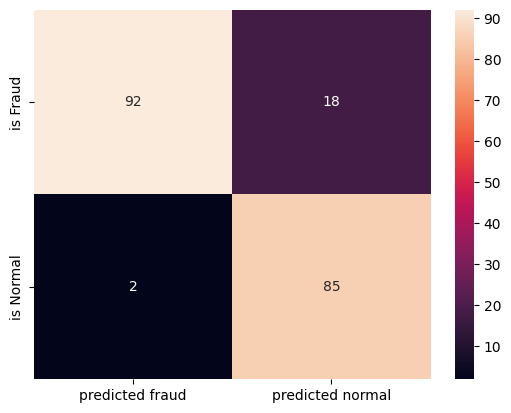

              precision    recall  f1-score   support

           0       0.83      0.98      0.89        87
           1       0.98      0.84      0.90       110

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197



In [105]:
cm_tree_cv=np.array(confusion_matrix(y_test,y_predict_tree_CV,labels=[1,0]))
confusion_tree_cv=pd.DataFrame(cm_tree_cv,index=['is Fraud','is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion_tree_cv)
import seaborn as sns
sns_tree_cv=sns.heatmap(confusion_tree_cv,annot=True)
plt.show(sns_tree_cv)
print(classification_report(y_test,y_predict_tree_CV))